In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import VarianceThreshold

In [2]:
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
import torch.optim.lr_scheduler as lr_scheduler
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error

In [3]:
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import time

In [4]:
import xgboost as xgb
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

## Load dataset

In [5]:
path_out = r'F:\Codes\joint attention\Nano-particle\output_new_new'

file_path_features_norm = os.path.join(path_out , 'features_normalized_35.npy')
file_path_labels = os.path.join(path_out , 'label_r_avg_raw.npy')
file_path_features_original = os.path.join(path_out , 'features_raw_35.npy')

with open( file_path_features_original , 'rb') as f:
    features_orig = np.load(f)
with open( file_path_labels , 'rb') as f:
    labels = np.load(f)
with open( file_path_features_norm , 'rb') as f:
    features_norm = np.load(f)

print(features_orig.shape)
print(labels.shape)
print(features_norm.shape)

(3999, 35)
(3999, 1)
(3999, 35)


## Visualize data

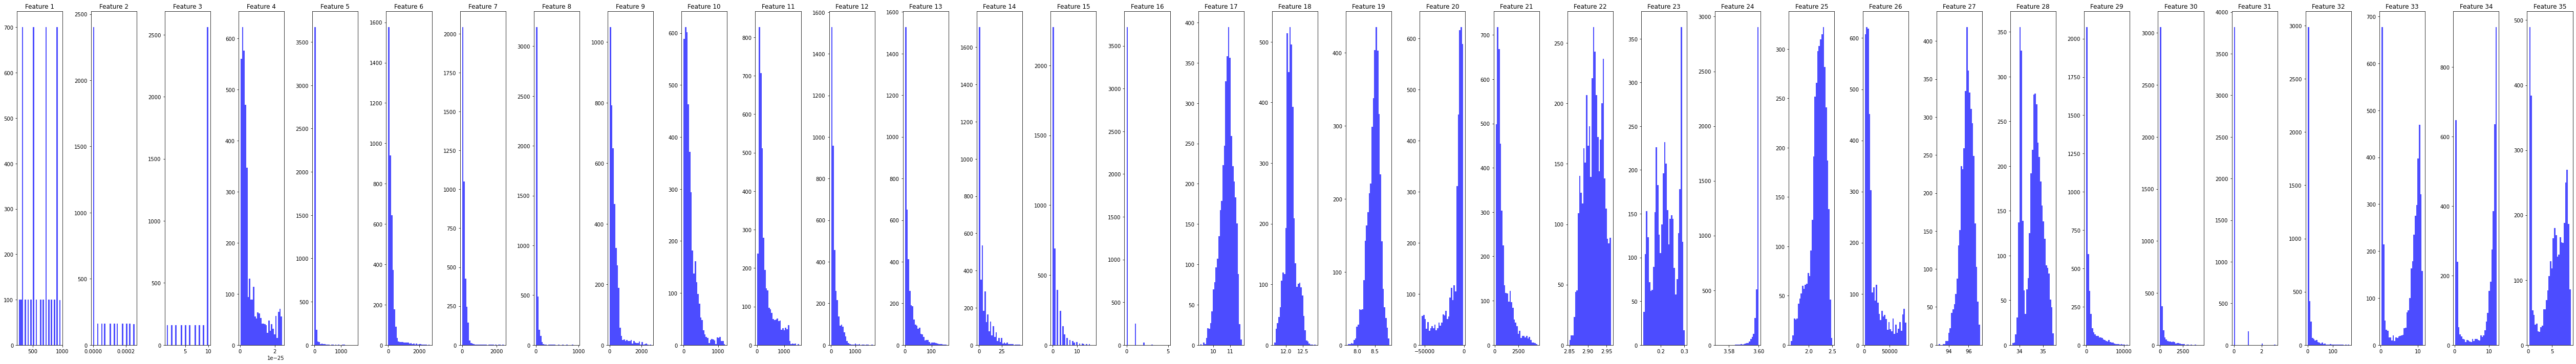

In [6]:
data = features_orig
fig, axs = plt.subplots(nrows=1, ncols=35, figsize=(70, 10))
for i in range(35):
    axs[i].hist(data[:, i], bins=30, color='blue', alpha=0.7)
    axs[i].set_title(f'Feature {i+1}')
plt.tight_layout()
plt.show()

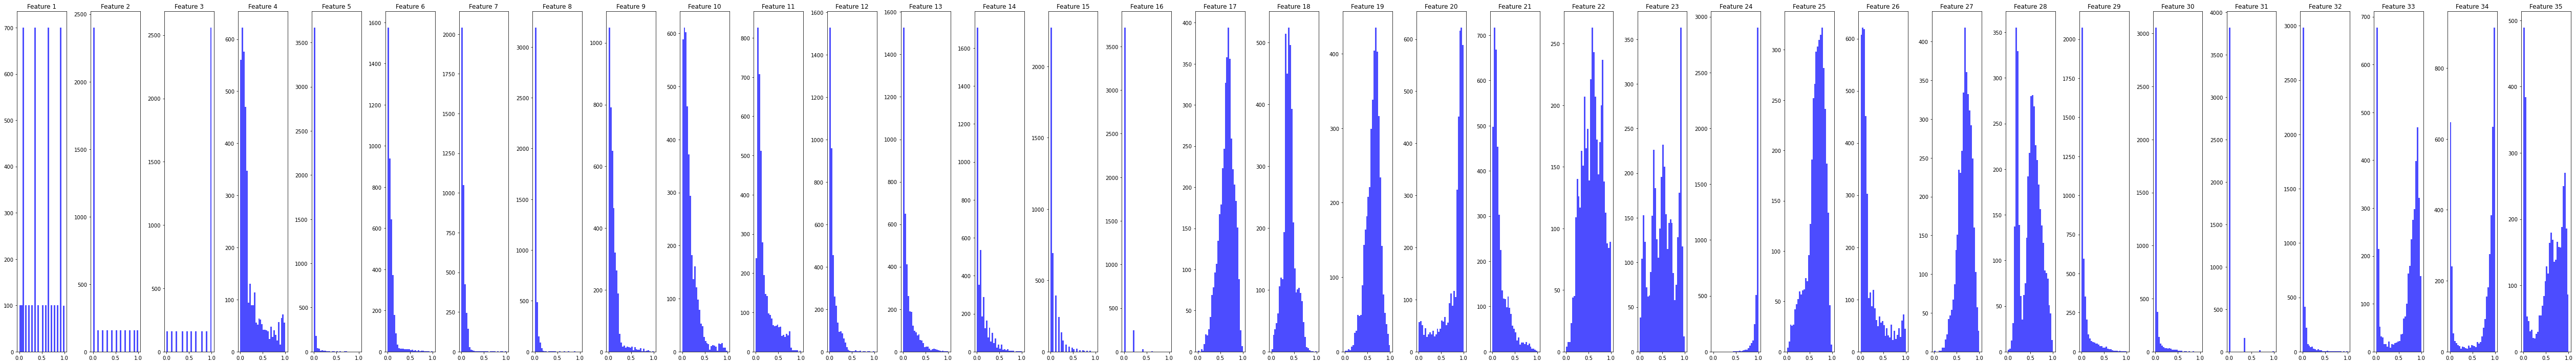

In [7]:
data = features_norm
fig, axs = plt.subplots(nrows=1, ncols=35, figsize=(70, 10))
for i in range(35):
    axs[i].hist(data[:, i], bins=30, color='blue', alpha=0.7)
    axs[i].set_title(f'Feature {i+1}')
plt.tight_layout()
plt.show()

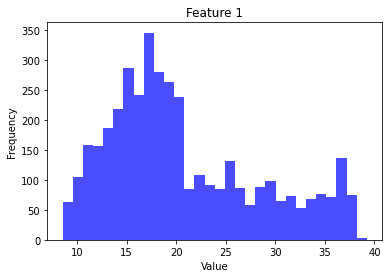

In [8]:
data = labels
plt.hist(data[:, 0], bins=30, color='blue', alpha=0.7)
plt.title('Feature 1')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

## Split the dataset into train , test and validation splits

In [9]:
# Split data into train and test sets
features_train, features_test, labels_train, labels_test = train_test_split(features_norm, labels, test_size=0.2, random_state=42)

print(f"features train shape: {features_train.shape}")
print(f"features test shape: {features_test.shape}") # tmp 
print(f"labels train shape: {labels_train.shape}")
print(f"labes test shape: {labels_test.shape}") # tmp

print(f"features train type: {type(features_train)}")
print(f"features test type: {type(features_test)}")
print(f"labels train type: {type(labels_train)}")
print(f"labes test type: {type(labels_test)}")

#test set again split into actual test and validation sets
features_validation, features_test, labels_validation, labels_test = train_test_split(features_test, labels_test, test_size=0.5, random_state=42)

print(f"features validation shape: {features_validation.shape}")
print(f"features test shape: {features_test.shape}")
print(f"labels validation shape: {labels_validation.shape}")
print(f"labes test shape: {labels_test.shape}")

print(f"features validation type: {type(features_validation)}")
print(f"features test type: {type(features_test)}")
print(f"labels validation type: {type(labels_validation)}")
print(f"labes test type: {type(labels_test)}")

features train shape: (3199, 35)
features test shape: (800, 35)
labels train shape: (3199, 1)
labes test shape: (800, 1)
features train type: <class 'numpy.ndarray'>
features test type: <class 'numpy.ndarray'>
labels train type: <class 'numpy.ndarray'>
labes test type: <class 'numpy.ndarray'>
features validation shape: (400, 35)
features test shape: (400, 35)
labels validation shape: (400, 1)
labes test shape: (400, 1)
features validation type: <class 'numpy.ndarray'>
features test type: <class 'numpy.ndarray'>
labels validation type: <class 'numpy.ndarray'>
labes test type: <class 'numpy.ndarray'>


## Model Training

In [10]:
def calc_MAPE_Percentage(actual_list , predicted_list):
#     assert len(predicted_list.shape) ==2
#     assert isinstance(predicted_list, list)
    assert len(actual_list.shape) == 2
    tmp=0
    num_samples = actual_list.shape[0]
        
    if len(predicted_list.shape) == 2:
#         print('con1')
        for i in range(num_samples):
            tmp += (np.abs(actual_list[i,0] - predicted_list[i,0]))/(np.abs(actual_list[i,0]))
    elif len(predicted_list.shape) == 1:
#         print('con2')
        for i in range(num_samples):
            tmp += (np.abs(actual_list[i,0] - predicted_list[i]))/(np.abs(actual_list[i,0])) 
    else:
        raise AssertionError
    MAPD = tmp/num_samples
    MAPD_perc = MAPD*100
    return MAPD_perc
    

## XG Boost (New- scikit API)

In [17]:
# import xgboost as xgb
# from sklearn.model_selection import GridSearchCV, train_test_split

# # Assuming X and y are your features and target variable
# # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# predictions_list = {'train':None,'test':None,'val':None}
# name = 'XGBoost'

# # Define your XGBoost regressor model
# model = xgb.XGBRegressor()

# # Define your parameter grid
# param_grid = {
#     'max_depth': [3],
#     'learning_rate': [0.2],
#     'n_estimators': [100],
#     'subsample': [0.8],
#     'colsample_bytree': [ 0.9,1.0]
# }

# # Set up GridSearchCV, using neg_mean_squared_error as an example scoring metric
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, verbose=1,n_jobs=-1)

# # Run grid search
# training_start = time.time()
# grid_search.fit(features_train, labels_train)
# training_end = time.time()

# # Evaluate results
# print("Best parameters found: ", grid_search.best_params_)
# best_rmse = (-grid_search.best_score_)**0.5  # Convert MSE to RMSE
# print("Best RMSE found: ", best_rmse)


# val_start = time.time()
# y_pred_validation = grid_search.predict(features_validation)
# val_end = time.time()
# predictions_list['val'] = y_pred_validation

# y_pred_train = grid_search.predict(features_train)
# predictions_list['train'] = y_pred_train

# testing_start = time.time()
# y_pred_test = grid_search.predict(features_test)
# # y_pred = rf_best.predict(features_test)
# testing_end = time.time()
# predictions_list['test'] = y_pred_test

# #metrics for train, test and validation
# val_rmse = mean_squared_error(labels_validation, predictions_list['val'], squared = False)
# val_mse = mean_squared_error(labels_validation, predictions_list['val'], squared = True)
# val_mae = mean_absolute_error(labels_validation, predictions_list['val'])
# val_r2 = r2_score(labels_validation, predictions_list['val'])
# print(f"Validation set with {name} - RMSE: {val_rmse:.10f}, MSE: {val_mse:.10f}, MAE: {val_mae:.10f} , R^2: {val_r2:.10f}")

# train_rmse = mean_squared_error(labels_train, predictions_list['train'], squared = False)
# train_mse = mean_squared_error(labels_train, predictions_list['train'], squared = True)
# train_mae = mean_absolute_error(labels_train, predictions_list['train'])
# train_r2 = r2_score(labels_train, predictions_list['train'])
# print(f"Train set with {name} - RMSE: {train_rmse:.10f}, MSE: {train_mse:.10f}, MAE: {train_mae:.10f}, R^2: {train_r2:.10f}")

# test_rmse = mean_squared_error(labels_test, predictions_list['test'], squared = False)
# test_mse = mean_squared_error(labels_test, predictions_list['test'], squared = True)
# test_mae = mean_absolute_error(labels_test, predictions_list['test'])
# test_r2 = r2_score(labels_test, predictions_list['test'])
# print(f"Test set with {name} - RMSE: {test_rmse:.10f}, MSE: {test_mse:.10f}, MAE: {test_mae:.10f}, R^2: {test_r2:.10f}")

# print("Time taken for training: {:.10f} seconds".format(training_end - training_start)) 
# print("Time taken for testing: {:.10f} seconds".format(testing_end - testing_start))
# print("Time taken for validation: {:.10f} seconds".format(val_end - val_start))


Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best parameters found:  {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Best RMSE found:  0.21084235228534867
Validation set with XGBoost - RMSE: 0.2121148789, MSE: 0.0449927218, MAE: 0.1492070580 , R^2: 0.9991903991
Train set with XGBoost - RMSE: 0.1462524477, MSE: 0.0213897785, MAE: 0.1124463629, R^2: 0.9996297393
Test set with XGBoost - RMSE: 0.1919949599, MSE: 0.0368620646, MAE: 0.1434283741, R^2: 0.9993916069
Time taken for training: 0.5760855675 seconds
Time taken for testing: 0.0010023117 seconds
Time taken for validation: 0.0009996891 seconds


In [12]:
grid_search.best_score_

-0.04445449751721907

In [14]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, train_test_split

# Assuming X and y are your features and target variable
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
predictions_list = {'train':None,'test':None,'val':None}
name = 'XGBoost'

# Define your XGBoost regressor model
model = xgb.XGBRegressor(random_state = 42)

# Define your parameter grid

# Define your parameter grid
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# param_grid = {
#     'max_depth': [3, 4, 5],
#     'learning_rate': [0.01]
# }


# Set up GridSearchCV, using neg_mean_squared_error as an example scoring metric
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, verbose=1,n_jobs=-1)

# Run grid search
training_start = time.time()
grid_search.fit(features_train, labels_train)
training_end = time.time()

# Evaluate results
print("Best parameters found: ", grid_search.best_params_)
best_rmse = (-grid_search.best_score_)**0.5  # Convert MSE to RMSE
print("Best RMSE found: ", best_rmse)


val_start = time.time()
y_pred_validation = grid_search.predict(features_validation)
val_end = time.time()
predictions_list['val'] = y_pred_validation

y_pred_train = grid_search.predict(features_train)
predictions_list['train'] = y_pred_train

testing_start = time.time()
y_pred_test = grid_search.predict(features_test)
# y_pred = rf_best.predict(features_test)
testing_end = time.time()
predictions_list['test'] = y_pred_test

#metrics for train, test and validation
val_rmse = mean_squared_error(labels_validation, predictions_list['val'], squared = False)
val_mse = mean_squared_error(labels_validation, predictions_list['val'], squared = True)
val_mae = mean_absolute_error(labels_validation, predictions_list['val'])
val_mapd = calc_MAPE_Percentage(labels_validation,predictions_list['val']) 
val_r2 = r2_score(labels_validation, predictions_list['val'])
print(f"Validation set with {name} - RMSE: {val_rmse:.10f}, MSE: {val_mse:.10f}, MAE: {val_mae:.10f} , MAPD: {val_mapd:.10f}, R^2: {val_r2:.10f}")

train_rmse = mean_squared_error(labels_train, predictions_list['train'], squared = False)
train_mse = mean_squared_error(labels_train, predictions_list['train'], squared = True)
train_mae = mean_absolute_error(labels_train, predictions_list['train'])
train_mapd = calc_MAPE_Percentage(labels_train,predictions_list['train']) 
train_r2 = r2_score(labels_train, predictions_list['train'])
print(f"Train set with {name} - RMSE: {train_rmse:.10f}, MSE: {train_mse:.10f}, MAE: {train_mae:.10f}, MAPD: {train_mapd:.10f}, R^2: {train_r2:.10f}")

test_rmse = mean_squared_error(labels_test, predictions_list['test'], squared = False)
test_mse = mean_squared_error(labels_test, predictions_list['test'], squared = True)
test_mae = mean_absolute_error(labels_test, predictions_list['test'])
test_mapd = calc_MAPE_Percentage(labels_test,predictions_list['test']) 
test_r2 = r2_score(labels_test, predictions_list['test'])
print(f"Test set with {name} - RMSE: {test_rmse:.10f}, MSE: {test_mse:.10f}, MAE: {test_mae:.10f}, MAPD: {test_mapd:.10f},  R^2: {test_r2:.10f}")

print("Time taken for training: {:.10f} seconds".format(training_end - training_start)) 
print("Time taken for testing: {:.10f} seconds".format(testing_end - testing_start))
print("Time taken for validation: {:.10f} seconds".format(val_end - val_start))


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameters found:  {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.8}
Best RMSE found:  0.1594269537850129
Validation set with XGBoost - RMSE: 0.1634051603, MSE: 0.0267012464, MAE: 0.0987243424 , MAPD: 0.5104278060, R^2: 0.9995195366
Train set with XGBoost - RMSE: 0.0400114327, MSE: 0.0016009147, MAE: 0.0306243791, MAPD: 0.1649786264, R^2: 0.9999722879
Test set with XGBoost - RMSE: 0.1532121561, MSE: 0.0234739648, MAE: 0.1021317899, MAPD: 0.4944572847,  R^2: 0.9996125719
Time taken for training: 80.4785125256 seconds
Time taken for testing: 0.0009999275 seconds
Time taken for validation: 0.0029997826 seconds


In [ ]:
# import xgboost as xgb
# from sklearn.model_selection import GridSearchCV, train_test_split

# # Assuming X and y are your features and target variable
# # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# # Define your XGBoost regressor model
# model = xgb.XGBRegressor()

# # Define your parameter grid
# param_grid = {
#     'max_depth': [3, 4, 5],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'n_estimators': [100, 200, 300],
#     'subsample': [0.8, 0.9, 1.0],
#     'colsample_bytree': [0.8, 0.9, 1.0]
# }

# # Set up GridSearchCV, using neg_mean_squared_error as an example scoring metric
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, verbose=1,n_jobs=-1)

# # Run grid search
# grid_search.fit(features_train, labels_train)

# # Evaluate results
# print("Best parameters found: ", grid_search.best_params_)
# best_rmse = (-grid_search.best_score_)**0.5  # Convert MSE to RMSE
# print("Best RMSE found: ", best_rmse)


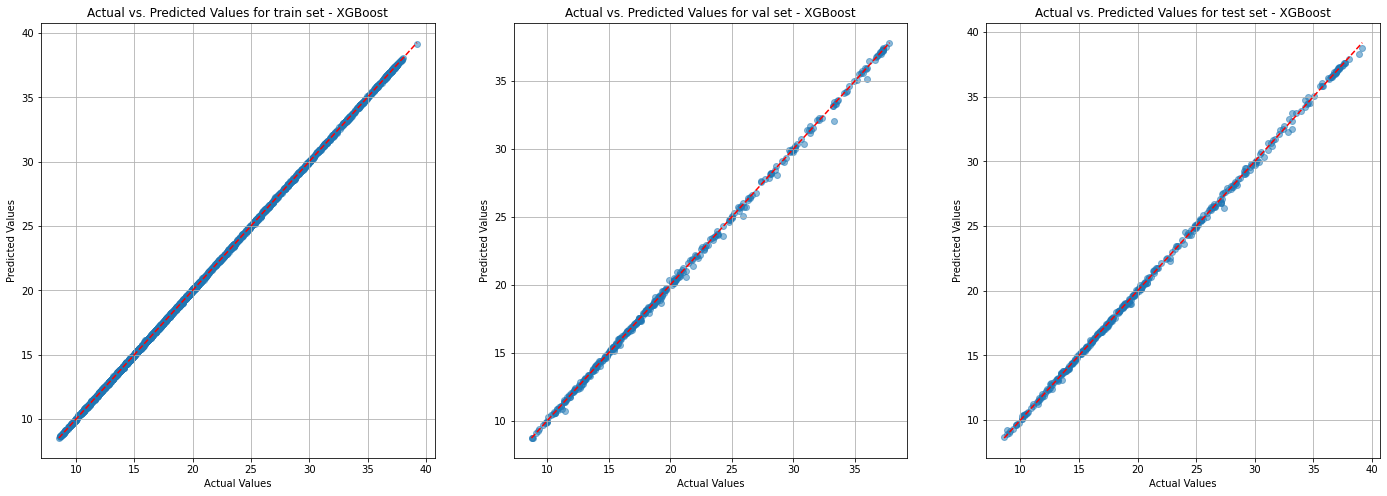

In [15]:
fig, axs = plt.subplots(1, 3, figsize=(24, 8))  # 1 row, 3 columns
set_d = ['train', 'val','test']
labels_set = [labels_train.squeeze(), labels_validation.squeeze(), labels_test.squeeze()]

for i in range(3):
    axs[i].scatter(labels_set[i], predictions_list[set_d[i]], alpha=0.5)
    axs[i].set_title(f"Actual vs. Predicted Values for {set_d[i]} set - XGBoost")
    axs[i].set_xlabel("Actual Values")
    axs[i].set_ylabel("Predicted Values")

    min_val = min(np.min(labels_set[i]), np.min(predictions_list[set_d[i]]))
    max_val = max(np.max(labels_set[i]), np.max(predictions_list[set_d[i]]))
    axs[i].plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')

    axs[i].grid(True)
plt.show()

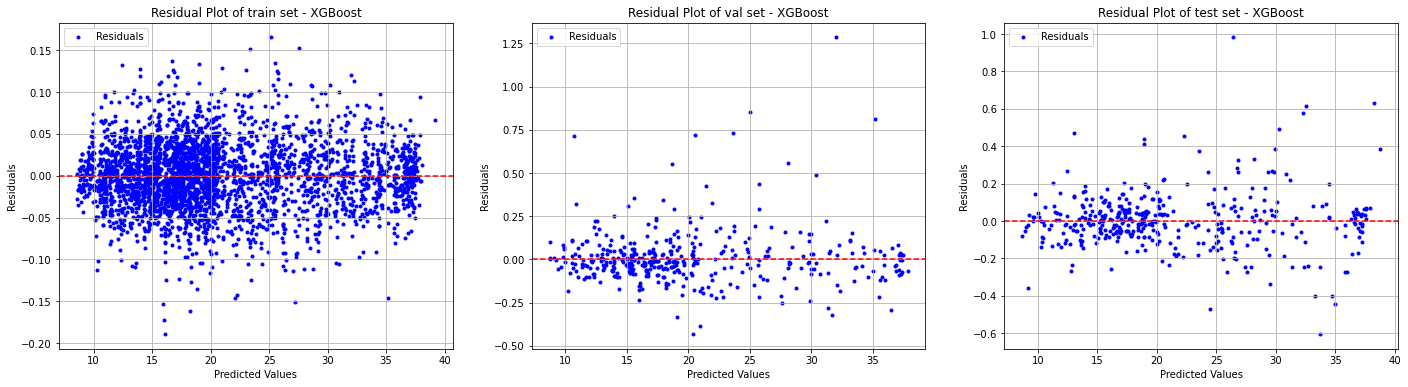

In [16]:
fig, axs = plt.subplots(1, 3, figsize=(24, 6))  # 1 row, 3 columns
residuals_set =  {'train':None,'test':None,'val':None}

for i in range(3):

    residuals = labels_set[i] - predictions_list[set_d[i]].squeeze()
    residuals_set[set_d[i]] = residuals
    
#     plt.figure(figsize=(8, 6))
    axs[i].scatter(predictions_list[set_d[i]], residuals, color='blue', marker='.', label='Residuals')
    axs[i].axhline(y=0, color='red', linestyle='--')
    axs[i].set_xlabel('Predicted Values')
    axs[i].set_ylabel('Residuals')
    axs[i].set_title(f'Residual Plot of {set_d[i]} set - XGBoost')
    axs[i].legend(loc='upper left')
    axs[i].grid(True)
plt.show()

3199
400
400


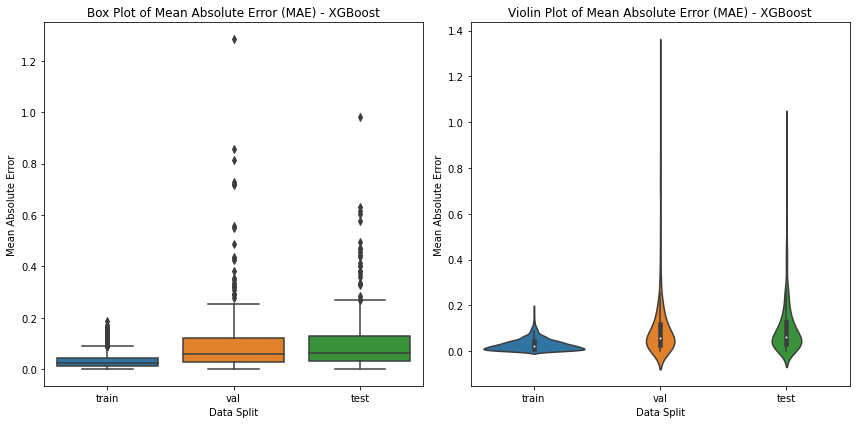

In [17]:
#train, test, val
df_list =[]
for i in range(3):
    num_samples = residuals_set[set_d[i]].shape[0]
    print(num_samples)
    mae_values = [abs(residuals_set[set_d[i]][j]) for j in range(num_samples)]
    df_list.append(pd.DataFrame(mae_values, columns=['MAE']))
    df_list[i]['Data Split'] = set_d[i]

combined_mae_df = pd.concat([df_list[0], df_list[1], df_list[2]])
    
plt.figure(figsize=(12, 6))

# Box plot
plt.subplot(1, 2, 1) 
sns.boxplot(x='Data Split', y='MAE', data=combined_mae_df)
# sns.boxplot(data=mae_df, y='MAE')
plt.title('Box Plot of Mean Absolute Error (MAE) - XGBoost')
plt.xlabel('Data Split')
plt.ylabel('Mean Absolute Error')

# Violin plot
plt.subplot(1, 2, 2)  
# sns.violinplot(data=mae_df, y='MAE')
sns.violinplot(x='Data Split', y='MAE', data=combined_mae_df)
plt.title('Violin Plot of Mean Absolute Error (MAE) - XGBoost')
plt.xlabel('Data Split')
plt.ylabel('Mean Absolute Error')

plt.tight_layout()
plt.show()

## XGBoost (without hyper-parameter tuning) - This was the original code we used to get the previous test acc for XGBoost - no hyper-param tuning

In [21]:
# # X_train, X_test, y_train, y_test = features_train,features_validation,labels_train,labels_validation

# dtrain = xgb.DMatrix(features_train, label=labels_train)
# dtest = xgb.DMatrix(features_test, label=labels_test)

# params = {
#     'max_depth': 3,              # the maximum depth of each tree
#     'eta': 0.3,                  # the training step for each iteration
#     'objective': 'reg:squarederror',  # regression with squared loss
# }

# num_rounds = 20

# training_start = time.time()
# bst = xgb.train(params, dtrain, num_rounds)
# training_end = time.time()

# testing_start = time.time()
# preds = bst.predict(dtest)
# testing_end = time.time()


# mse = mean_squared_error(y_test, preds)
# print("MSE: %.10f" % mse)
# r2 = r2_score(y_test, preds)
# print(f"R^2: {r2:.10f}")

# print("Time taken for training: {:.10f} seconds".format(training_end - training_start))
# print("Time taken for testing: {:.10f} seconds".format(testing_end - testing_start))

MSE: 0.0902745647
R^2: 0.9983632739
Time taken for training: 0.0767943859 seconds
Time taken for testing: 0.0009982586 seconds


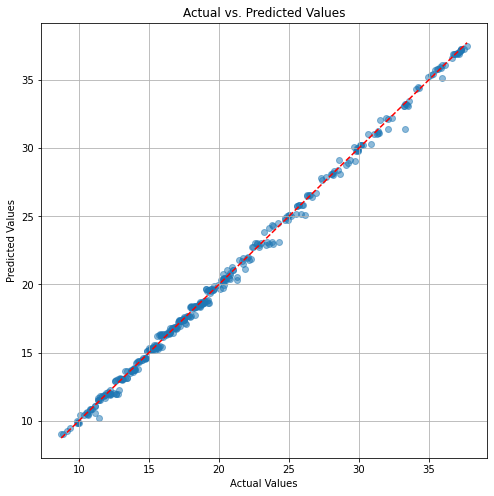

In [22]:
# predicted_values = preds
# actual_values = y_test
# # Scatter plot
# plt.figure(figsize=(8, 8))
# plt.scatter(actual_values, predicted_values, alpha=0.5)
# plt.title("Actual vs. Predicted Values")
# plt.xlabel("Actual Values")
# plt.ylabel("Predicted Values")

# min_val = min(np.min(actual_values), np.min(predicted_values))
# max_val = max(np.max(actual_values), np.max(predicted_values))
# plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')

# plt.grid(True)
# plt.show()

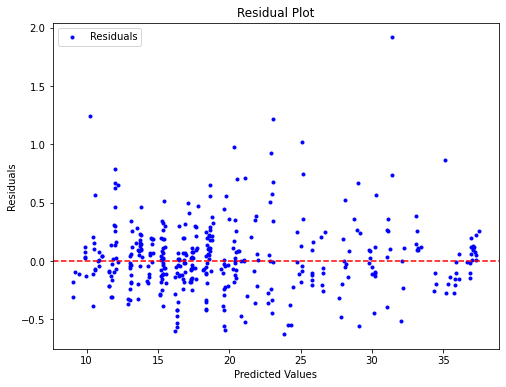

In [24]:
# residuals = actual_values.squeeze() - predicted_values

# plt.figure(figsize=(8, 6))
# plt.scatter(predicted_values, residuals, color='blue', marker='.', label='Residuals')
# plt.axhline(y=0, color='red', linestyle='--')
# plt.xlabel('Predicted Values')
# plt.ylabel('Residuals')
# plt.title('Residual Plot')
# plt.legend(loc='upper left')
# plt.show()

Fitting 3 folds for each of 729 candidates, totalling 2187 fits
Best parameters found:  {'colsample_bytree': 0.8, 'eta': 0.1, 'gamma': 0, 'max_depth': 5, 'min_child_weight': 2, 'subsample': 0.7}

In [ ]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'max_depth': [3, 4, 5],
#     'min_child_weight': [1, 2, 3],
#     'gamma': [0, 0.1, 0.2],
#     'subsample': [0.7, 0.8, 0.9],
#     'colsample_bytree': [0.7, 0.8, 0.9],
#     'eta': [0.01, 0.1, 0.2]
# }

# # param_grid = {
# #     'max_depth': [3, 4],
# #     'min_child_weight': [1, 2]
# # }

# xgb_reg = xgb.XGBRegressor(objective='reg:squarederror')

# grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, 
#                            cv=3, n_jobs=-1, verbose=2)

# grid_search.fit(X_train, y_train)

# print("Best parameters found: ", grid_search.best_params_)

In [36]:
# # best parameters used for 
# X_train, X_test, y_train, y_test = features_train,features_validation,labels_train,labels_validation


# dtrain = xgb.DMatrix(X_train, label=y_train)
# dtest = xgb.DMatrix(X_test, label=y_test)


# # params = {
# #     'max_depth': 3,              # the maximum depth of each tree
# #     'eta': 0.3,                  # the training step for each iteration
# #     'objective': 'reg:squarederror',  # regression with squared loss
# # }


# params = {'colsample_bytree': 0.8, 
#           'eta': 0.1, 
#           'gamma': 0, 
#           'max_depth': 5, 
#           'min_child_weight': 2, 
#           'subsample': 0.7, 
#           'objective': 'reg:squarederror'}


# num_rounds = 20


# training_start = time.time()
# bst = xgb.train(params, dtrain, num_rounds)
# training_end = time.time()


# testing_start = time.time()
# preds = bst.predict(dtest)
# testing_end = time.time()


# mse = mean_squared_error(y_test, preds)
# print("MSE: %.10f" % mse)
# r2 = r2_score(y_test, preds)
# print(f"R^2: {r2:.10f}")


# print("Time taken for training: {:.10f} seconds".format(training_end - training_start))
# print("Time taken for testing: {:.10f} seconds".format(testing_end - testing_start))

MSE: 6.9412073251
R^2: 0.8741521991
Time taken for training: 0.0759983063 seconds
Time taken for testing: 0.0040001869 seconds
